   
   # Econ5121 B&C (Fall 2018)

### Zhentao Shi

* Time Series
* Panel data
* Generalized method of moments

### Useful R Packages

* `quantmod`: financial and US macro data
* `Quandl`: many data resources

* `dynlm`: single-equation dynamic model
* `tsDyn`: multiple-equation dynamic models


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "SPY"

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     111.1660
2007-01-04   141.23   142.05  140.61    141.67   69620600     111.4019
2007-01-05   141.33   141.40  140.38    140.54   76645300     110.5134
2007-01-08   140.82   141.41  140.25    141.19   71655000     111.0245
2007-01-09   141.31   141.60  140.40    141.07   75680100     110.9301
2007-01-10   140.58   141.57  140.30    141.54   72428000     111.2997

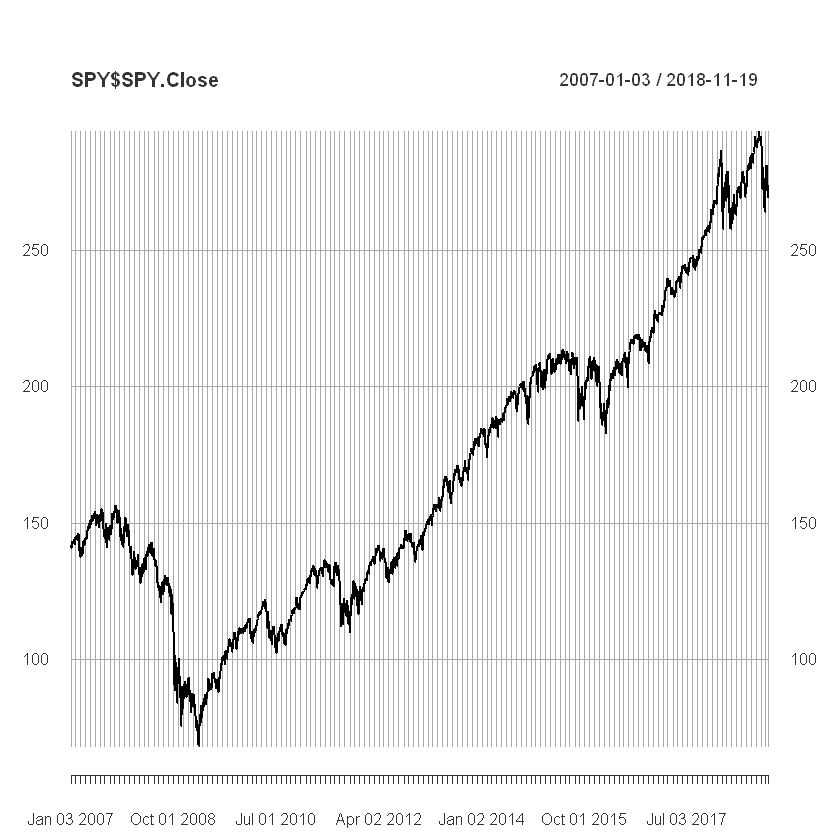

In [1]:
library(quantmod, quietly = TRUE)
getSymbols("SPY") # S&P 500

head(SPY)
plot(SPY$SPY.Close, type = "l")

In [2]:
library(Quandl)
CNH=Quandl("UNAE/GDPCD_CHN") #https://www.quandl.com/data/UNAE/GDPCD_CHN-GDP-Current-Prices-US-Dollars-China
HKG=Quandl("UNAE/GDPCD_HKG") #https://www.quandl.com/data/UNAE/GDPCD_HKG-GDP-Current-Prices-US-Dollars-China-Hong-Kong-SAR

head(CNH)


Date,Final consumption expenditure,Household consumption expenditure (including Non-profit institutions serving households),General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product (GDP)
2016-12-31,6.022740e+12,4.412399e+12,1.610341e+12,4.945627e+12,4.760264e+12,185362869377,2.197922e+12,1.948009e+12,1.121828e+13
2015-12-31,5.817208e+12,4.271064e+12,1.546145e+12,5.023470e+12,4.841486e+12,181983470306,2.431269e+12,2.045768e+12,1.122619e+13
2014-12-31,5.344122e+12,3.947950e+12,1.396172e+12,4.927496e+12,4.721351e+12,206145530960,2.524142e+12,2.261227e+12,1.053453e+13
2013-12-31,4.847475e+12,3.546983e+12,1.300491e+12,4.552678e+12,4.372736e+12,179942436024,2.354264e+12,2.119392e+12,9.635026e+12
2012-12-31,4.294971e+12,3.145220e+12,1.149750e+12,4.043513e+12,3.874966e+12,168547661996,2.175069e+12,1.943205e+12,8.570348e+12
2011-12-31,3.730148e+12,2.732075e+12,9.980728e+11,3.611060e+12,3.399710e+12,211349602109,2.006309e+12,1.825414e+12,7.522103e+12


# Dynamic regression model

$$
y_t = \beta_1 + \beta_2 x_t + \beta_3 x_{t-1} + \gamma y_{t-1} + e_t
$$

## Motivations

* temporal lags of effect
* expectation formed from the past
* explicitly depends on history

[1] "POILBREUSDQ"

[1] "IPB50001SQ"

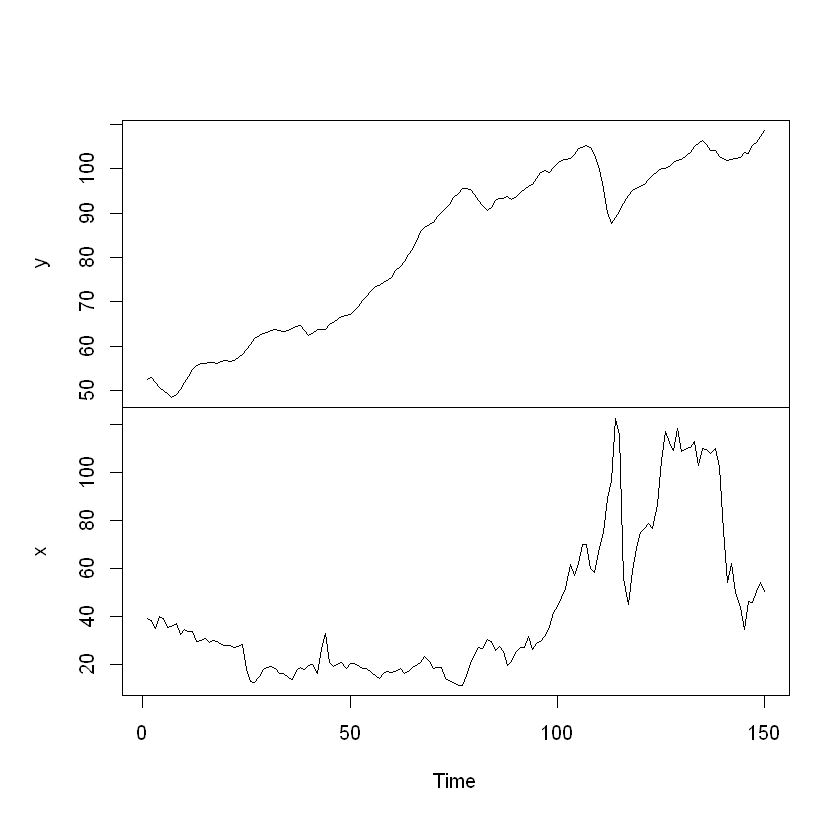

In [3]:
library(quantmod)
getSymbols.FRED(Symbols = "POILBREUSDQ", env = .GlobalEnv) # Brent Oil price
x = POILBREUSDQ; T = length(x)
getSymbols.FRED(Symbols = "IPB50001SQ", env = .GlobalEnv) # Instrial Index (quaterly data)
Ty = length(IPB50001SQ); y = IPB50001SQ[(Ty - T + 1):Ty]

x = ts(x); y = ts(y)
plot(cbind(y,x), main = "")

### ARDL(1,1) regression example

In [4]:
library(dynlm)
reg = dynlm( y ~ L(y, c(1) ) + L(x,c(1:2) ) )  
print(summary(reg))


Time series regression with "ts" data:
Start = 3, End = 150

Call:
dynlm(formula = y ~ L(y, c(1)) + L(x, c(1:2)))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5015 -0.3181  0.1689  0.6214  1.8076 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.485609   0.409017   1.187    0.237    
L(y, c(1))     1.001323   0.005566 179.888   <2e-16 ***
L(x, c(1:2))1 -0.019474   0.011192  -1.740    0.084 .  
L(x, c(1:2))2  0.014260   0.011101   1.285    0.201    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.051 on 144 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9968 
F-statistic: 1.533e+04 on 3 and 144 DF,  p-value: < 2.2e-16



# Lagged Effect

$$y_t = \alpha + \sum_{i=0}^{\infty} \beta_i  x_{t-i} + e_t$$

## Interpretation as a generative model

* Impact multiplier: $\beta_0$
* Cumulated effect (of $\tau$ periods): $\sum_{i=0}^{\tau} \beta_i $
* Equilibrium multiplier: $\sum_{i=0}^{\infty} \beta_i $

# Lag Operator

$$L x_t = x_{t-1}$$
$$L^{\tau} x_t = x_{t-\tau}$$ 

## Difference operator
$$\Delta x_t = x_t - x_{t-1} = (1-L) x_t$$

# Stationary time series

For a univariate time series $(y_t)_{t= - \infty} ^ {\infty}$,
* **Strictly stationary**: joint distribution of any finite coordinate only depends on their relative position.
* **Weakly stationary**: the first two moments of any pair $y_t$ and $y_s$ only depends on their relative position.
    * $E[y_t] = \mu$ for all $t$
    * $\mathrm{var}[y_t] = \sigma^2$ for all $t$
    * $\mathrm{cov}[y_t, y_{t+\tau} ] $ only depends on $\tau$ independent of $t$



This notion can be extended to multiple-variate time series, for example $(y_t, x_t, e_t)$.

## Dynamic regression model

$$y_t = \alpha + \sum_{i=0}^{\infty} \beta_i  x_{t-i} + e_t = \alpha + B(L) x_t + e_t $$
where $$B(L) = \sum_{i=0}^{\infty} \beta_i L^i$$ is a polynomial of the lag operators.

## Autoregressive model
$$y_t = \alpha + \sum_{i=1}^p \gamma_p y_{t-p} + e_t $$ can be written as 
$$ C(L) y_t = \alpha + e_t $$ where $$C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p $$ is a polynomial of the lag operators.

# Invertibility

If the roots of the polynomial equation $C(z) = 0$ **all** lies **outside** of the unit circle, we say the autoregressive model is invertible.

More generally, in the polynomial equation $C(z) = 0$, the root with the smallest module determines the trend of the time series.

If $e_t$ is stationary with finite variance and $\alpha=0$
* If the module of the smallest root is bigger than 1, $y_t$ is a stationary time series
* If the module of the smallest root is equal to 1, $y_t$ is a **unit root** process
* If the module of the smallest root is smaller than 1, $y_t$ is an **explosive** process


### Numerical Example

* $C(L) = 1 - 0.5L$ is invertible.
* $C(L) = 1 - L$ is non-invertible.
* $C(L) = 1 - 1.1L$ is non-invertible.

In [5]:
AR = function(b,T){
    y = rep(0,T)
    for (t in 1:T){
        if (t == 1) {
            y[t] = 0
            } else {
            y[t] = b * y[t - 1] + rnorm(1)
        }
    }
    return(ts(y) )
}

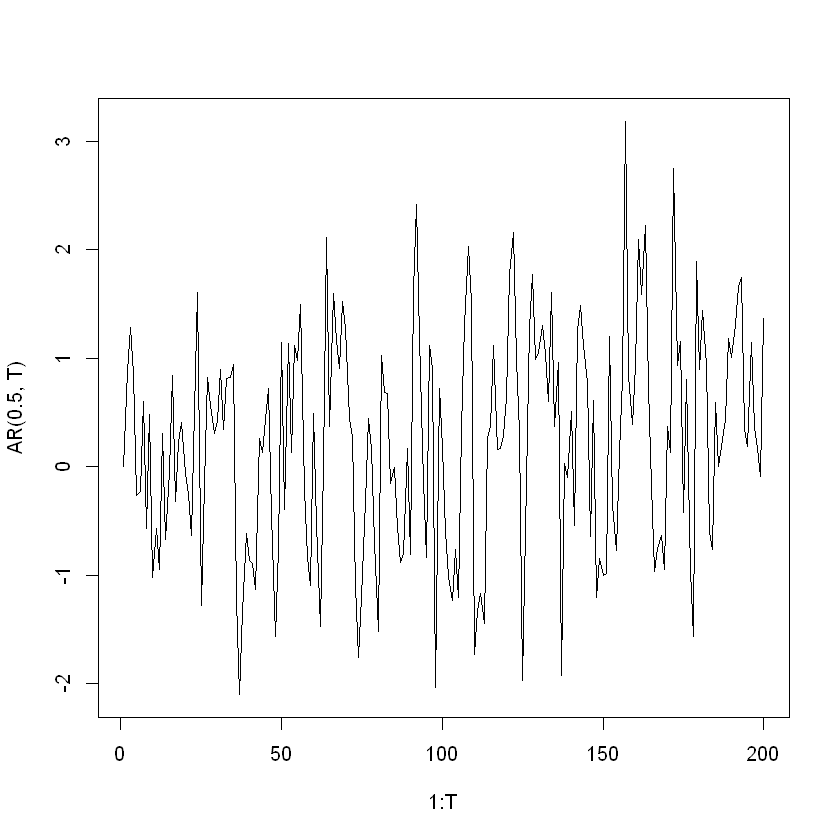

In [6]:
T = 200; plot( x = 1:T, y = AR(0.5, T), type = "l")

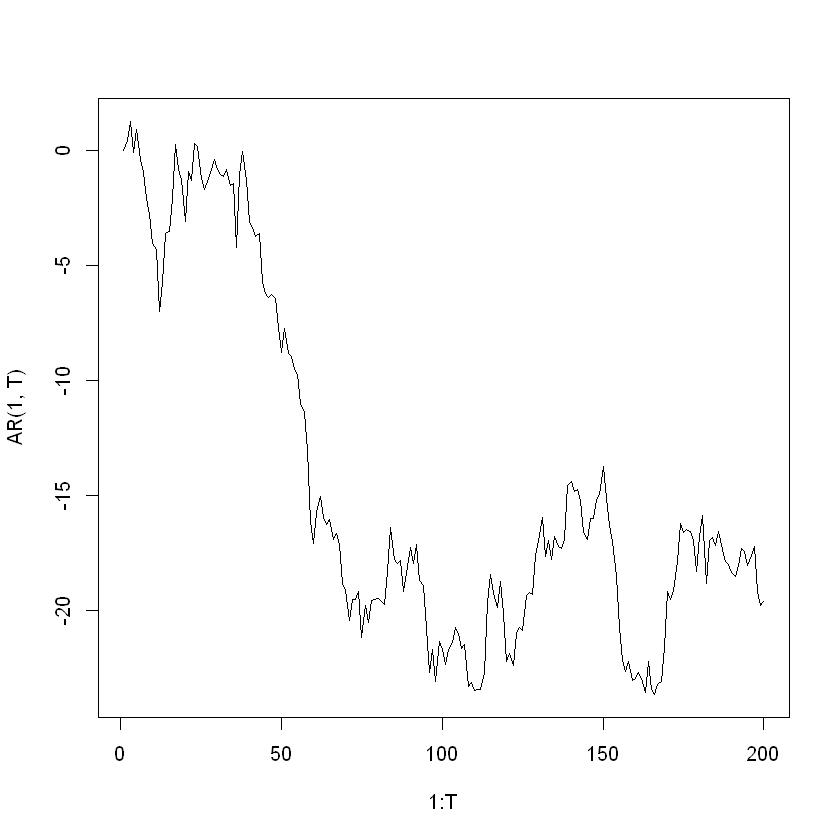

In [7]:
T = 200; plot( x = 1:T, y = AR(1.0, T), type = "l")

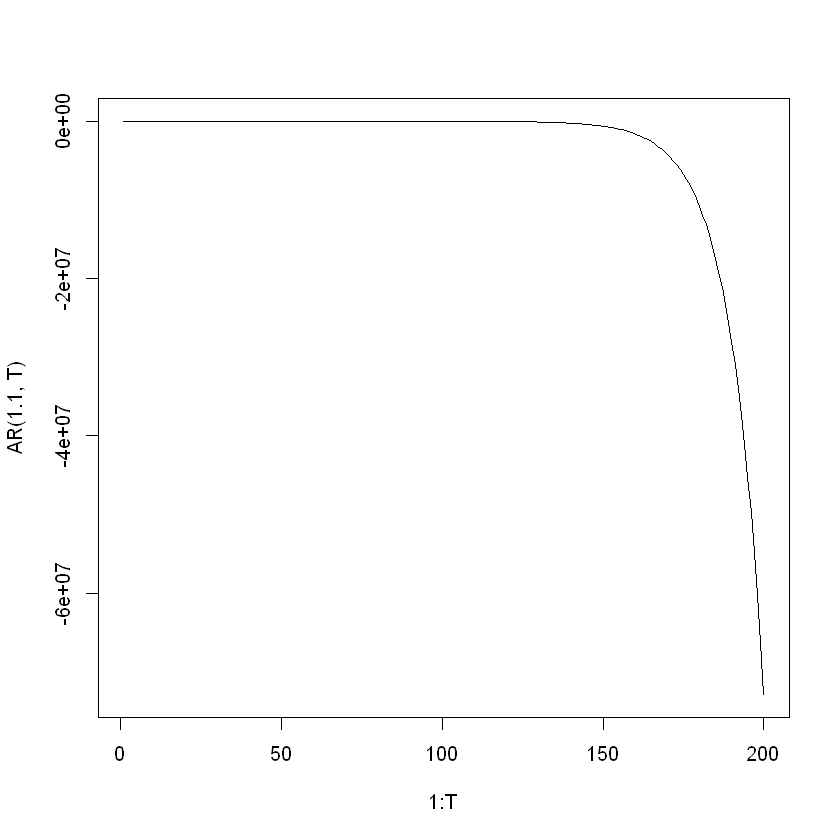

In [8]:
T = 200; plot( x = 1:T, y = AR(1.1, T), type = "l")

# Autoregressive Distributed Lag Models


ARDL(p,r) model:
$$C(L) y_t = \mu + B(L) x_t + e_t $$ 
where 
$$C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p$$
and 
$$B(L) =  \beta_0 + \beta_1 L + \cdots + \beta_r L^r.$$

**Granger causality**: $\beta_0 = \beta_1 = \cdots = \beta_r = 0$.

# Error Correction Model

Cliver Granger (Nobel prize 2001)

Subtract $y_{t-1}$ from both sides of the ARDL(1,1) model
$$
\begin{align*}
\Delta y_t & = \mu + \beta_0 x_t + \beta_1 x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\beta_1 + \beta_0) x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\gamma_1 -1 )( y_{t-1} - \theta x_{t-1} ) + e_t  
\end{align*}
$$
where $\theta =  (\beta_1 + \beta_0)/(1 - \gamma_1)$.

* An equilibrium relationship $\Delta y_t = \mu + \beta_0 \Delta x_t + e_t$.
* An equilibrium error $(\gamma_1 - 1 ) (y_{t-1} - \theta x_{t-1} ) $.



* Useful to identify spurious regression
* First difference recovers stationarity

* Can be estimated either by OLS or by NLS or by MLE


# Spurious Regression


* The two time series $\{y_t\}$ and $\{x_t\}$ are generated independently, so that $E[y_t|x_t] = 0$. 
* However, we observe a high $R^2$ and large t-value if we regression $y_t$ against $x_t$.


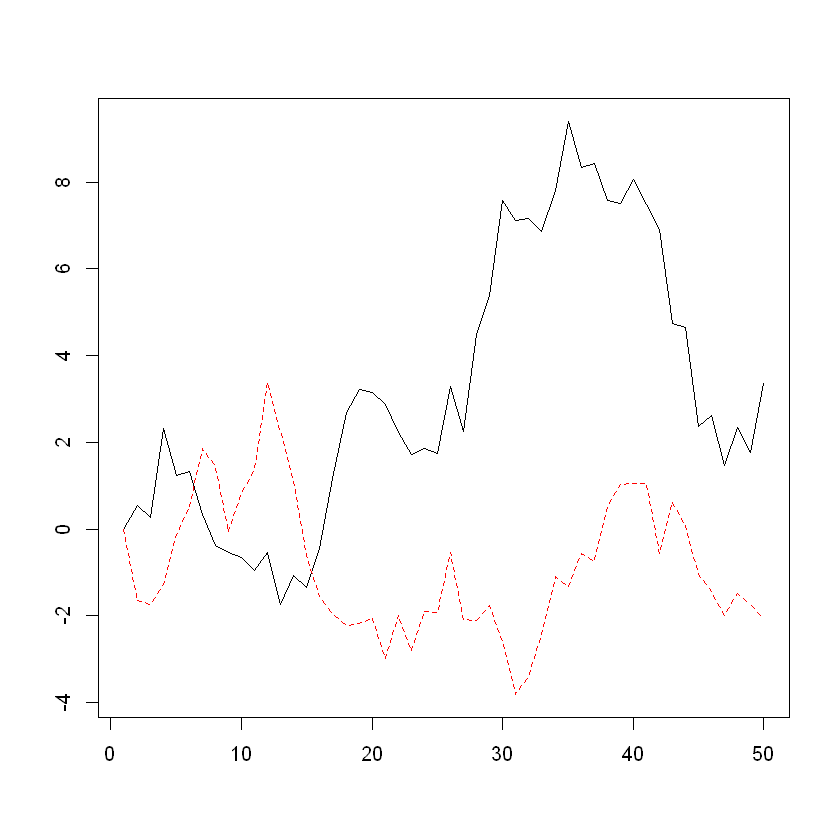

In [9]:
T = 50
a = 1

y <- AR(a, T)
x <- AR(a, T)
matplot( cbind(y, x), type = "l", ylab = "" )

In [10]:
reg <- lm(y ~ x)
summary(reg)


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-4.369 -2.334 -1.137  2.392  5.994 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7131     0.4988   5.439 1.78e-06 ***
x            -0.5227     0.2811  -1.859   0.0691 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.094 on 48 degrees of freedom
Multiple R-squared:  0.06718,	Adjusted R-squared:  0.04775 
F-statistic: 3.457 on 1 and 48 DF,  p-value: 0.06912


Granger and Newbold (1974)

run a regression to check that if we naively use 1.96 as the critical value for the $t$-ratio, how often we would reject the null hypothesis that $\beta = 0$. 

* The nominal asymptotic test size is $5\%$ according to the standard asymptotic theory
* The empirical size is about 0.80 in this simulation
* The drastic deviation suggests that the standard asymptotic theory fails in the nonstationary environment.


In [11]:
spurious <- function(i, a, T){
    y <- AR(a, T)
    x <- AR(a, T)
    
    reg <- lm(y ~ x)
    p.val <- summary(reg)[[4]][2,4]
    # save the p-value of the estimate of x's coefficient
    return(p.val)
}

library("plyr")
out <- ldply(.data = 1:100, .fun = spurious, a = 1, T = 100)
print( mean(out < 0.05) )

[1] 0.85


# Model Specification

Information criterion. 

Let $k$ be the total number of slope coefficient in the model.

* Akaike information criterion: $\log( \hat{\sigma}^2 ) + 2\times (k / T )$. 
    * Tend to overfit, but better for prediction
* Bayesian information criterion: $\log( \hat{\sigma}^2 ) + \log(T) \times (k / T )$
    * Model selection consistent

# Vector Autoregression (VAR)

Christopher Sims (Nobel Prize 2011)

An $m$-equation system
$$ y_t = \mu + \Gamma_1 y_t + \cdots + \Gamma_p y_{t-p} + v_t $$
where $E[ v_t v_t'] = \Omega$.

For prediction purpose, as a reduced-form of structural simultaneous equations.

### Estimation

* For consistency and asymptotic normality, use OLS equation by equation
* For asymptotic efficient, use multiple-equation GLS



# Invertibility

Write the VAR(p) as
$$ (I_m - \Gamma (L) ) y_t = \mu + v_t $$ 
where $\Gamma(z) = \Gamma_1 z + \cdots + \Gamma_p z^p$. 

Stable means that all roots of the $p$-order polynomial equation $$ I_m - \Gamma(z)  = 0_m $$ lies out of the unit circle.

# Impulse Response Function

IRF characterizes the diffusion of an exogenous shock with the dynamic system.

$$
\begin{align*}
y_t & = (I - \Gamma(L) )^{-1} (\mu + v_t) \\
    & = \bar{y} + v_t + \sum_{i=1}^{\infty} A_i v_{t-i} 
\end{align*}
$$ where $\bar{y} = (I - \Gamma(L) )^{-1} \mu = ( I_m + \sum_{i=1}^{\infty} A_i ) \mu $.

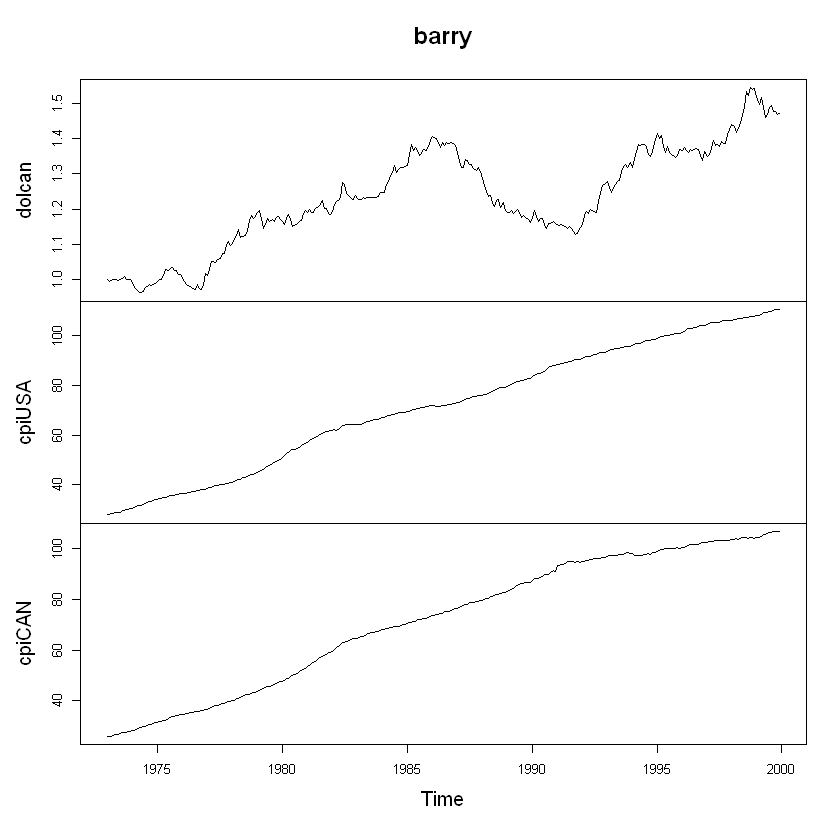

In [12]:
library(tsDyn)
data(barry)
plot(barry)

In [13]:
## For VAR
mod_var <- lineVar(barry, lag = 2)
print(mod_var)

                 Intercept dolcan -1    cpiUSA -1     cpiCAN -1  dolcan -2
Equation dolcan 0.01990322 1.1399804 -0.004066429 -0.0002021078 -0.1609825
Equation cpiUSA 0.24882495 0.5057742  1.473457565 -0.0339894803 -0.5695014
Equation cpiCAN 0.18849724 0.3767774  0.311281524  0.9816315731 -0.2280215
                   cpiUSA -2     cpiCAN -2
Equation dolcan  0.004722663 -0.0003366803
Equation cpiUSA -0.474160066  0.0342943942
Equation cpiCAN -0.316325397  0.0206687371


In [14]:

irf_var = irf(mod_var, impulse = "dolcan", response = c("dolcan", "cpiUSA", "cpiCAN"), boot = FALSE)
print(irf_var)


Impulse response coefficients
$dolcan
          dolcan        cpiUSA        cpiCAN
 [1,] 0.01263041 -0.0048261838 -0.0123959584
 [2,] 0.01442056 -0.0003017074 -0.0089117109
 [3,] 0.01439029  0.0018221283 -0.0050181633
 [4,] 0.01407837  0.0017585360 -0.0023138114
 [5,] 0.01373609  0.0005588836 -0.0003808992
 [6,] 0.01339939 -0.0011470315  0.0011612521
 [7,] 0.01307097 -0.0030532930  0.0025146740
 [8,] 0.01274968 -0.0050206825  0.0037743835
 [9,] 0.01243458 -0.0069875398  0.0049833475
[10,] 0.01212512 -0.0089270518  0.0061607665
[11,] 0.01182103 -0.0108278553  0.0073152342



In [15]:

## For VECM
mod_VECM <- VECM(barry, lag = 2, estim="ML", r=2)
print(mod_VECM)
irf_vecm = irf(mod_VECM, impulse = "dolcan", response = c("dolcan", "cpiUSA", "cpiCAN"), boot = FALSE)
print(irf_vecm)

                       ECT1          ECT2  Intercept dolcan -1    cpiUSA -1
Equation dolcan -0.02042246  0.0005673094 0.02193776 0.1631849 -0.003512162
Equation cpiUSA -0.05190423  0.0013970958 0.20996826 0.6604052  0.472999555
Equation cpiCAN  0.12661059 -0.0036778683 0.15127295 0.3462574  0.282921542
                    cpiCAN -1   dolcan -2    cpiUSA -2    cpiCAN -2
Equation dolcan  0.0004160986 -0.03139173 -0.000241599 -0.006599772
Equation cpiUSA -0.0325415257 -0.56714589 -0.025142321  0.076688519
Equation cpiCAN -0.0260677455 -0.33043721  0.013968232  0.170121385

Impulse response coefficients
$dolcan
          dolcan        cpiUSA        cpiCAN
 [1,] 0.01254489 -0.0029302360 -7.383446e-03
 [2,] 0.01434484  0.0035655133 -2.087037e-03
 [3,] 0.01398363 -0.0006891768 -3.406078e-03
 [4,] 0.01356168 -0.0043964840 -2.535065e-03
 [5,] 0.01324901 -0.0069522987 -2.187395e-03
 [6,] 0.01294200 -0.0086735230 -1.091890e-03
 [7,] 0.01263782 -0.0101398959  8.207361e-05
 [8,] 0.01233276 -0.01144

# Structural VAR

* Unrestricted VAR: too many parameters? $m+p\cdot m^2 + m(m+1)/2$
* Use economic theory to reduce the number of unknown parameters